##### Importing libraries

In [1]:
## data analysis libraries
import pandas as pd
import numpy as np
## data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
## date manipulation library
import datetime
## warning removal
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the data
data = pd.read_csv("trip.csv")

In [3]:
# checking the data
print(data.shape)
data.head()

(236065, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


## Data Dictionary

Our data has 2,36,065 rows and 12 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236065 entries, 0 to 236064
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            236065 non-null  int64  
 1   starttime          236065 non-null  object 
 2   stoptime           236065 non-null  object 
 3   bikeid             236065 non-null  object 
 4   tripduration       236065 non-null  float64
 5   from_station_name  236065 non-null  object 
 6   to_station_name    236065 non-null  object 
 7   from_station_id    236065 non-null  object 
 8   to_station_id      236065 non-null  object 
 9   usertype           236065 non-null  object 
 10  gender             146171 non-null  object 
 11  birthyear          146167 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 21.6+ MB


We see that we have 9 categorical variables ,
3 numeric variables.

#### Continuos variables
- tripduration
- trip_id
- birthyear
- from_station_id 
- to_station_id
#### Datetime variables
- starttime
- stoptime
#### Nominal variables
- gender
- usertype
#### string variables
- from_station_name
- to_station_name

## Univariate analysis

#### Determining time range of dataset.

In [5]:
data = data.sort_values(by = 'starttime')
data.reset_index()
print("Date range of dataset is : %s - %s"%(data.loc[1,'starttime'],data.loc[len(data)-1,'stoptime']))

Date range of dataset is : 10/13/2014 10:32 - 9/1/2016 0:20


The dataset is of three years(i.e. from 2014 - 2016) and the typically the time was from standard 9-5 business hours.

## user - type

Generally people use short time passes more. But if they are satisfied with the service they avail membership passes. let's assess the condition here.

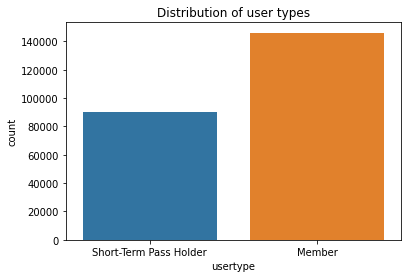

In [6]:
sns.countplot(data['usertype'])
plt.title("Distribution of user types")
plt.show()

## Gender

An article says that in UK 77% of avail cycle sharing scheme are men. Let's check this out.

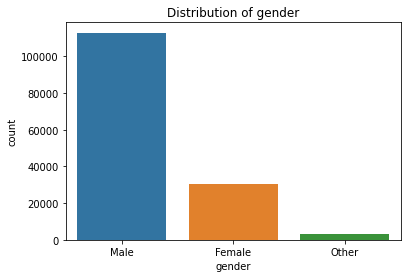

In [7]:
sns.countplot(data['gender'])
plt.title("Distribution of gender")
plt.show()

Since being a marketing company we have to understand our customers, lets see their age.

We see that most customers belong to age group of 30-40.

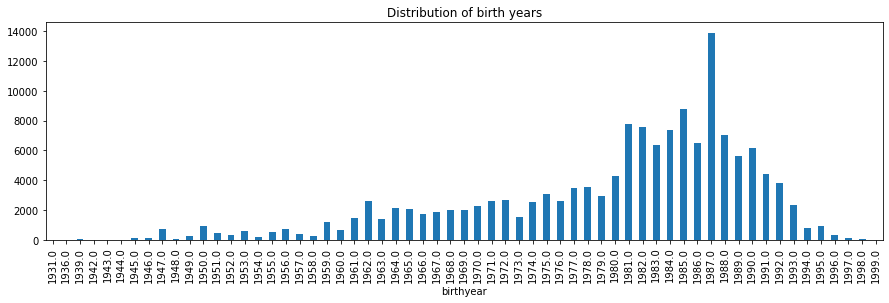

In [8]:
data = data.sort_values(by = 'birthyear')
groupby_year = data.groupby('birthyear').size()
groupby_year.plot.bar(title = 'Distribution of birth years',figsize = (15,4))
plt.show()

We see that most of the customers belonged to birthyear between 1980-1993.
I have read in an article that people who were born before 2000 (called millenials) are loyal to their favourite brands.One reason for this is their willingness to share thoughts and
opinions on products/services. These opinions thus form a huge corpus of experiences—
enough information for the millenials to make a conscious decision, a decision they will
remain loyal to for a long period.
Hence it can be made out that most of customers should have a membership.

<AxesSubplot:title={'center':'Loyal Customers usertype'}, xlabel='usertype'>

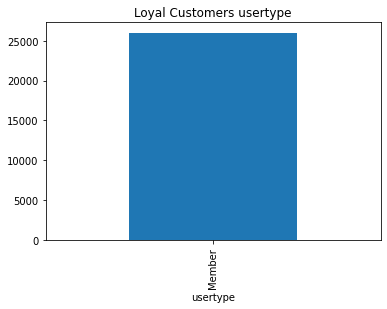

In [9]:
data_loyal = data[(data['birthyear']>=1980) & (data['birthyear']<=1983)]
groupby_loyal = data_loyal.groupby("usertype").size()
groupby_loyal.plot.bar(title = 'Loyal Customers usertype')

Hence we see all of them were Members.

Now millenials become important part of our marketing campaign.

## Mulitivariate Analysis

It is also true that males dominated too in completing cycle trips than female.
Let's check our customers birthyear according to gender.

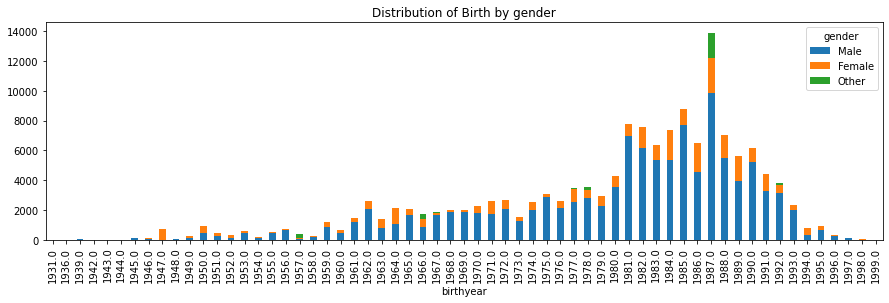

In [10]:
groupby_birthyear_gender = data.groupby(['birthyear','gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title = 'Distribution of Birth by gender',stacked = True,figsize = (15,4))
plt.show()

Here we see that really male dominated here too most of the times. But at certain 
years like those who were born between 1946 - 1952,1964 and 1994, female dominated over males.
Moreover subscribers born in 1947 were all females. 

It can also be seen that members who were born in 1957 were mostly belonged to 'Others' gender category. A significant portion of members from this category was also seen from the birthyear 1987.

<AxesSubplot:title={'center':'Distribution of birthyear by user type'}, xlabel='birthyear'>

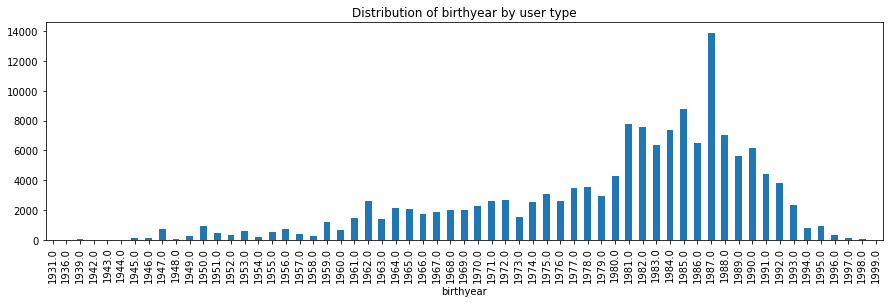

In [11]:
groupby_birthyear_usertype = data.groupby(['birthyear','usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_usertype['Member'].plot.bar(title = 'Distribution of birthyear by user type',stacked = True, figsize = (15,4))

We only have members here. lets check out that if birthyear is provided for member types only.

In [12]:
data[data['usertype'] == 'Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

Therefore , we have birthyear only for members nand not for short-term pass holders. Hence our hypothesis that milennials are loyal to thier brands is true.

This can also be reason since short-term pass holders are not asked their birthyear generalyy. Lets check if we have gender data available.

In [13]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

Here we see that we do not have gender also for Short - term pass holders. So we can conclude that we do not contain any demographic information for Short-term pass holders.

## Time Series analysis

In [14]:
## converting the date time variables.
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

#### Distribution of Trip duration by date

In [15]:
## extarcting features from date variables
data['starttime_date'] = data['starttime'].dt.date

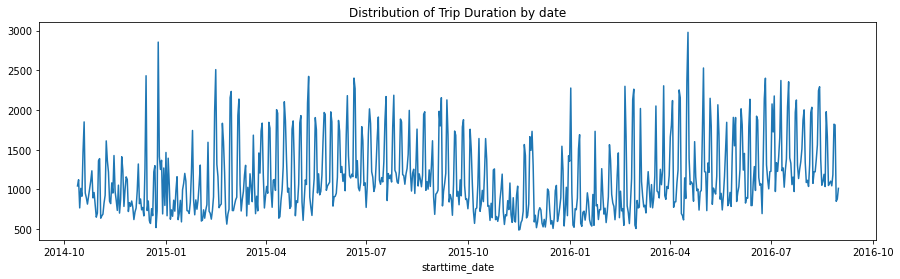

In [16]:
data.groupby('starttime_date')['tripduration'].mean().plot(title = 'Distribution of Trip Duration by date',figsize = (15,4))
plt.show()

In [17]:
data['moving_avg'] = data['tripduration'].rolling(window = 10).mean()

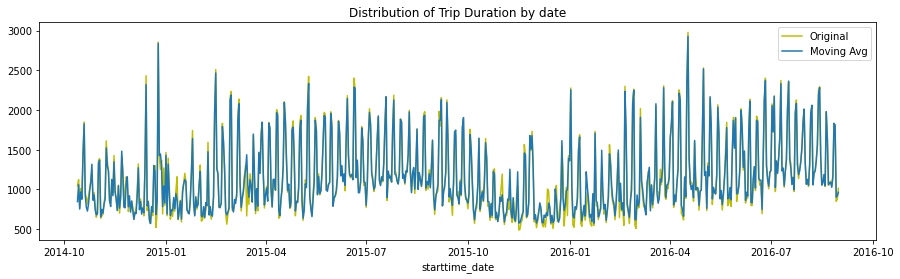

In [18]:
data.dropna()
data.groupby('starttime_date')['tripduration'].mean().plot(title = 'Distribution of Trip Duration by date',figsize = (15,4),label = 'Original',color = "y")
data.groupby('starttime_date')['moving_avg'].mean().plot(title = 'Distribution of Trip Duration by date',figsize = (15,4),label = 'Moving Avg')
plt.legend(loc = 'best')
plt.show()

- We can see some seasonailty here as well. The distribution is dense in lower values and spikes can be seen frequently.
- We see that at the start of business in 2014 , there are many huge spikes, so people were using cycle sharing service more during its early time.
- We can see that trip made at start of the year and at end of year are generally of less duration .
- **Trip Duration increases after April and this trend is seen till July. So this Duration can be seen as an Opportunity to increase our marketing campaign.**

#### Distribution number of trips by year

In [19]:
## extracting year from startime
data['starttime_year'] = data['starttime'].dt.year

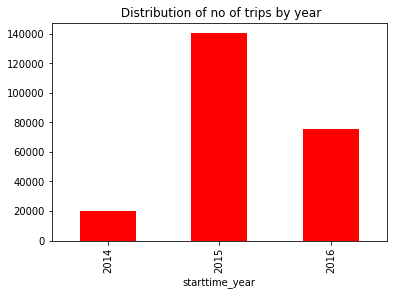

In [20]:
data.groupby(['starttime_year']).count()['trip_id'].plot.bar(title = " Distribution of no of trips by year",cmap =plt.get_cmap("flag"))
plt.show()

We see that most of the trips are taken in 2015. It was very less when the cycle sharing service was started in May 2014 , and suddenly got a huge boost in 2015. But the company started  loosing customers after 2015. 

#### Distribution of number of trips by month

In [21]:
## extracting month from starttime
data['starttime_month'] = data['starttime'].dt.month

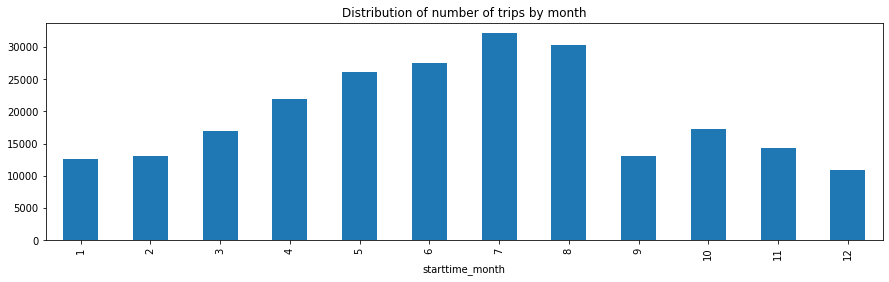

In [22]:
data.groupby('starttime_month').count()['trip_id'].plot.bar(title = 'Distribution of number of trips by month',figsize = (15,4))
plt.show()

We see that use of the cycle sharing service increased till september , it was highest in september.

#### Distribution of number of trips by day

In [23]:
data['starttime_day'] = data['starttime'].dt.day

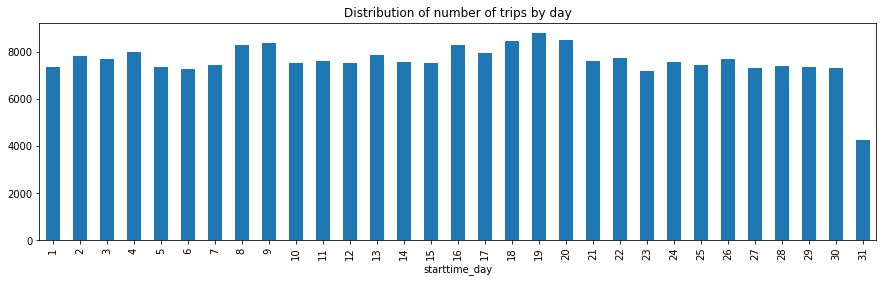

In [24]:
data.groupby("starttime_day").count()['trip_id'].plot.bar(title = 'Distribution of number of trips by day',figsize = (15,4))
plt.show()

we see that number of trips made on month end were less than on other days. 
We also see that in mid-month cycle-trips were made in large numbers. 

## Determining measures of center

In [25]:
print("Mean trip duration is {:.2f} seconds".format(data['tripduration'].mean()))
print("Median trip duration is {:.2f} seconds".format(data['tripduration'].median()))
print("-------------------------------------------")
print("Most frequent starting station is {}".format(data['from_station_name'].mode()))

Mean trip duration is 1202.61 seconds
Median trip duration is 633.24 seconds
-------------------------------------------
Most frequent starting station is 0    Pier 69 / Alaskan Way & Clay St
dtype: object


Most of the trips originate from **Pier 69/Alaskan Way & clay St station**. Thus it can be made a good spot for our promotional campaign banner and advertisements as well providing some special offers.  

But here our mean is greater than median .It signals towards skewed distribution.Lets check out.


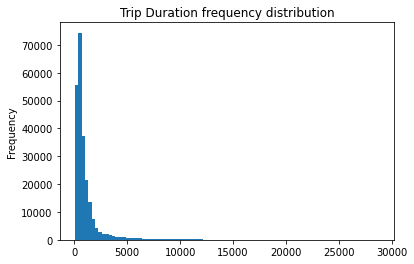

In [26]:
data['tripduration'].plot.hist(title = 'Trip Duration frequency distribution',bins = 90)
plt.show()

#### checking outliers in trip duration

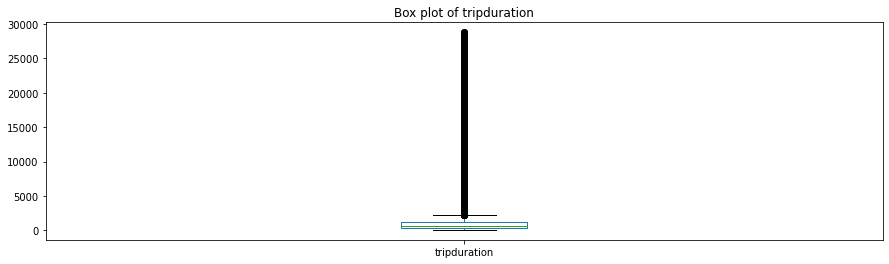

In [27]:
data['tripduration'].plot.box(title = 'Box plot of tripduration',figsize = (15,4))
plt.show()

We have a huge number of outliers here. Let's check proportion of outliers.

In [28]:
q75,q25 = np.percentile(data['tripduration'],[75,25])
iqr = q75-q25
print('Proportion of values as outlier: %f percent'%(
(len(data) - len([x for x in data['tripduration'] if q75+(1.5*iqr)
>=x>= q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of values as outlier: 9.548218 percent


It is very good to see that only 9.5 % of the values are outliers. 
Now as we have time series data we cannot remove these outliers as it can faulter the data. so we have to apply transform to data, or mean trnasforms.

#### calculating zscores for tripduration.

In [29]:
mean_trip_duration = np.mean([x for x in data['tripduration'] if q75+(1.5*iqr)>=x>=q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print("Mean of tripduration of non-outlier values: %f"%mean_trip_duration)
print("Mean of tripduration considering all values : %f"%data['tripduration'].mean())

Mean of tripduration of non-outlier values: 711.726573
Mean of tripduration considering all values : 1202.612210


we see that outliers are affecting much. while our original mean was 1202.6.
The mean without outliers were just 711.72. This describes the notion that mean is highly affected by presence of outliers.

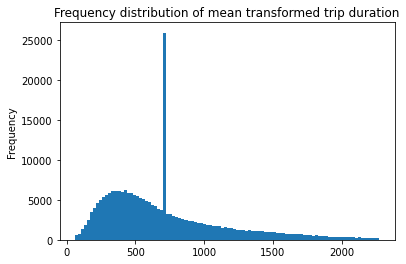

In [30]:
def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x
data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))
data['tripduration_mean'].plot.hist(bins= 100,title = 'Frequency distribution of mean transformed trip duration')
plt.show()

In [31]:
print("Mean trip duration of transformed data: %f"%data['tripduration_mean'].mean())
print("Standard Deviation of trip duration of transformed data: %f"%data['tripduration_mean'].std())
print("Median trip duration of transformed data: %f"%data['tripduration_mean'].median())

Mean trip duration of transformed data: 711.726573
Standard Deviation of trip duration of transformed data: 435.517297
Median trip duration of transformed data: 633.235000


Skewness is grealty decreased by transformation. We have majority of observations have a tripduration at 711 because all values above upper whisker are not transformed.

Also we see that our median has approached our mean so it can be said that the positive skewness is not that strong.

We knew that males dominated females during no of trips is it same for trip duration. let's check.

#### Knowing the distribution of trip duration by gender male

In [32]:
print("Mean of trip duration where male was involved is %.2f"%(data[data['gender']=="Male"]['tripduration']).mean())
print("Median of trip duration where male was involved is %.2f"%(data[data['gender']=="Male"]['tripduration']).median())
print("Mode of trip duration where male was involved is %.2f"%(data[data['gender']=="Male"]['tripduration']).mode())

Mean of trip duration where male was involved is 563.40
Median of trip duration where male was involved is 458.45
Mode of trip duration where male was involved is 466.17


We can see here that distribution is positive skewed. On an Average male spent 563.4 seconds for trips.

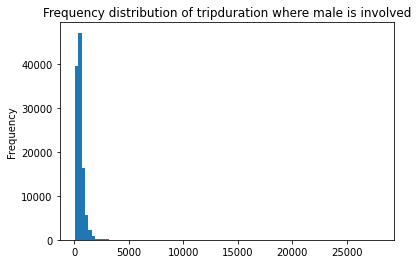

In [33]:
trip_duration_male = data[data['gender']=="Male"]['tripduration']
trip_duration_male.plot.hist(bins = 90,title = "Frequency distribution of tripduration where male is involved")
plt.show()

As we already thought it is positive skewed. and here it is.

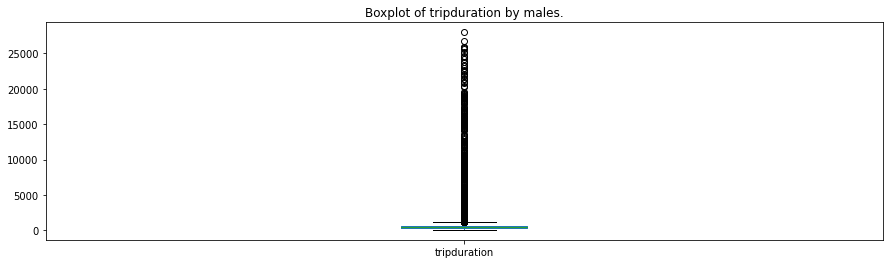

In [34]:
trip_duration_male.plot.box(title = "Boxplot of tripduration by males.",figsize = (15,4))
plt.show()

Here too we have outliers.

In [35]:
q75,q25 = np.percentile(trip_duration_male,[75,25])
iqr = q75-q25
print('Proportion of values as outlier: %f percent'%(
(len(data) - len([x for x in trip_duration_male if q75+(1.5*iqr)
>=x>= q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of values as outlier: 54.563785 percent


We have 54.56 percent outliers in trip duration.

Lets transform the outliers.

In [36]:
upper_whisker = q75+(1.5*iqr)

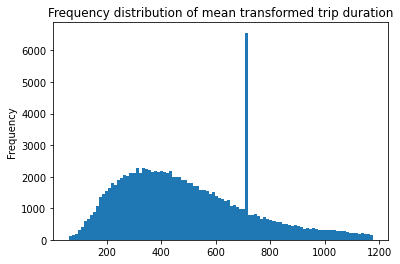

In [37]:
def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x
data['tripduration_mean'] = trip_duration_male.apply(lambda x: transform_tripduration(x))
data['tripduration_mean'].plot.hist(bins= 100,title = 'Frequency distribution of mean transformed trip duration')
plt.show()

Now we have a slight but almost normal distribution .

we see that mostly trips taken by male ranged from 100 seconds to 700 seconds. There were very few cases when the time exceeded 1500 seconds. We also see a spike at 700 seconds. It was also seen in our main tripduration distribution.

### Do change in age bring linear change in trip duration?

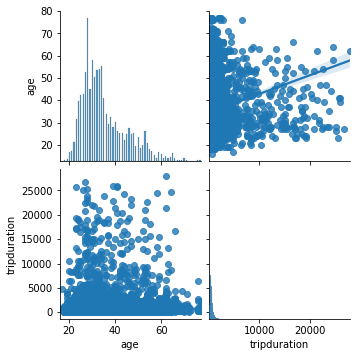

                   age  tripduration
age           1.000000      0.061929
tripduration  0.061929      1.000000


In [38]:
data = data.dropna()
data['age'] = data['starttime_year'] - data['birthyear'] 
sns.pairplot(data,vars = ['age','tripduration'],kind = 'reg')
plt.show()

correlations = data[['age','tripduration']].corr(method = 'pearson')
print(correlations)

We have a very minor but positive correlation between age and trip duration.

# Conclusion
I analysed the data and thus reached to final thoughts:
- The Data was only given for Members, so we seperately have to analyse by gathering more data about Short-term pass Holders.
- Our Main marketing Area should be **Pier 69/Alaskan Way & clay St station** as it is the station from which maximum trips are originated.
- Our Marketing Banner should focus more upon the **age-group 34-40**.
- Since mostly males were the prime members of this service, We should also focus upon increasing our reach to females , thus also making a diligent part of our campaign. 
- The prime time when long trips were usually made were during April to July. According to <a href ='https://travel.usnews.com/Seattle_WA/When_To_Visit'>Best Time to visit Seattle</a> these are the months when Seattle mostly experience tourists and customers. So by giving special offers and discounts we can attract more customers for using this service.